# Schwarshild coordinates Einstein Tensor calculations using Symbolic module
## The nonlocal breather

In [25]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import einsteinpy

from sympy import symbols, sin, cos, sinh, ln
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()
print(einsteinpy.__version__)

from celluloid import Camera
from IPython.display import Video



0.4.0


### Idea is to follow the Nov 1 2021 work where i used energy density to get a guess at a vacuum breather.

#### Make time tick regular, waves get longer as they go to bigger r, these are waves of gravitational field energy (the energy in the grav potential field), they need to get longer to support the fact that we need to hold a fraction F of the mean mass M in the wave. 



![alt-text](img/schwarschild.png "Schwarschild coords")


-F*M*w*cos(w*(t - log(r)/(F*w)))
M*cos(w*(t - log(r)/(F*w)))/r


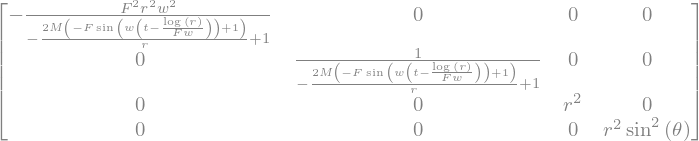

In [26]:
syms = sympy.symbols("t r theta phi")
G, M, F, a, w = sympy.symbols("G M F a w")
a = M*(1 - F*sin(w*(syms[0] - 1/(w*F)*ln(syms[1]))))

mT = sympy.diff(a, syms[0])
print(mT)
mR = sympy.diff(a, syms[1])
print(mR)


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]

#take your pick
list2d[0][0] = -mT*mT/(mR*mR)/(1 - 2*a/syms[1])
#list2d[0][0] = mT/mR/(1 - 2*a/syms[1])
#list2d[0][0] = -1/(1 - 2*a/syms[1])

list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()



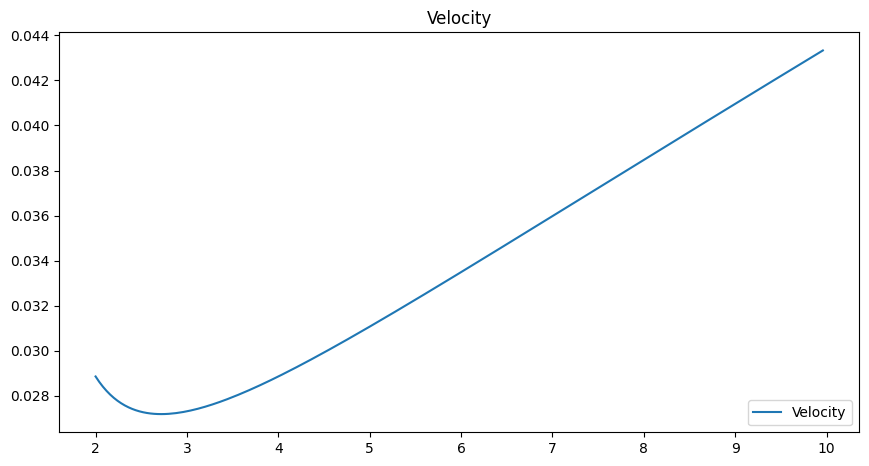

In [27]:
#wave front velocity as a function of r
# for a typical sine wave travelling along we have (v == velocity) 
#normalSin = sin(w*(syms[0] - syms[1]/v))
#so for us we have a wave front velocity - just mult by r/r and v
#normalSin = sin(w*(syms[0] - syms[1]/(syms[1]/ln(syms[1]*F)))
F = 0.01
w = 1

#Make x values - which we will sub in for r 
x = np.arange(2.0, 10.0, 0.04)
vel = x*F*w/(np.log(x))

fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,vel, label="Velocity")

ax.set_title("Velocity")

ax.legend(loc="lower right")


### Calculating the Einstein Tensor (with both indices covariant)

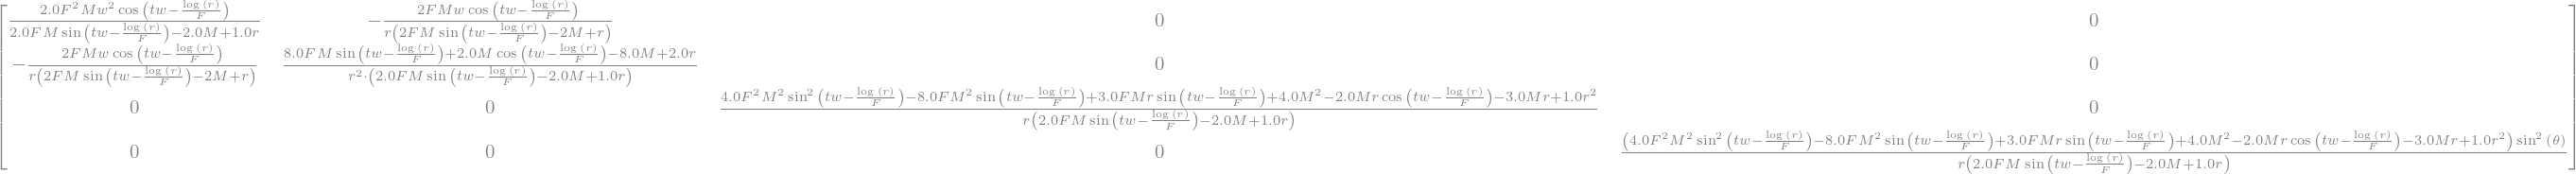

In [28]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

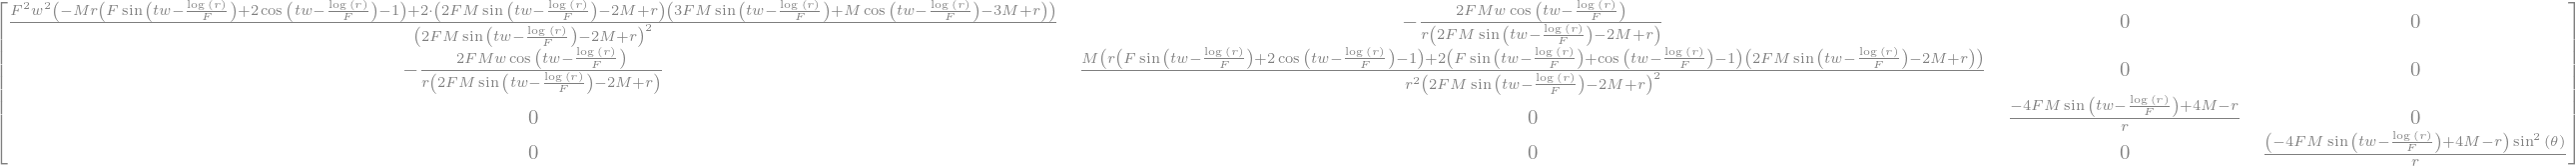

In [29]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

(t, r, theta, phi, F, M, w)
(t, r, theta, phi, F, M, w)


<lambdifygenerated-12>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array([[2.0*F**2*M*w**2*cos(t*w - log(r)/F)/(2.0*F*M*sin(t*w - log(r)/F) - 2.0*M + 1.0*r), -2*F*M*w*cos(t*w - log(r)/F)/(r*(2*F*M*sin(t*w - log(r)/F) - 2*M + r)), 0, 0], [-2*F*M*w*cos(t*w - log(r)/F)/(r*(2*F*M*sin(t*w - log(r)/F) - 2*M + r)), (8.0*F*M*sin(t*w - log(r)/F) + 2.0*M*cos(t*w - log(r)/F) - 8.0*M + 2.0*r)/(r**2*(2.0*F*M*sin(t*w - log(r)/F) - 2.0*M + 1.0*r)), 0, 0], [0, 0, (4.0*F**2*M**2*sin(t*w - log(r)/F)**2 - 8.0*F*M**2*sin(t*w - log(r)/F) + 3.0*F*M*r*sin(t*w - log(r)/F) + 4.0*M**2 - 2.0*M*r*cos(t*w - log(r)/F) - 3.0*M*r + 1.0*r**2)/(r*(2.0*F*M*sin(t*w - log(r)/F) - 2.0*M + 1.0*r)), 0], [0, 0, 0, (4.0*F**2*M**2*sin(t*w - log(r)/F)**2 - 8.0*F*M**2*sin(t*w - log(r)/F) + 3.0*F*M*r*

Text(0.5, 1.0, 'Einstein / Ricci Components')

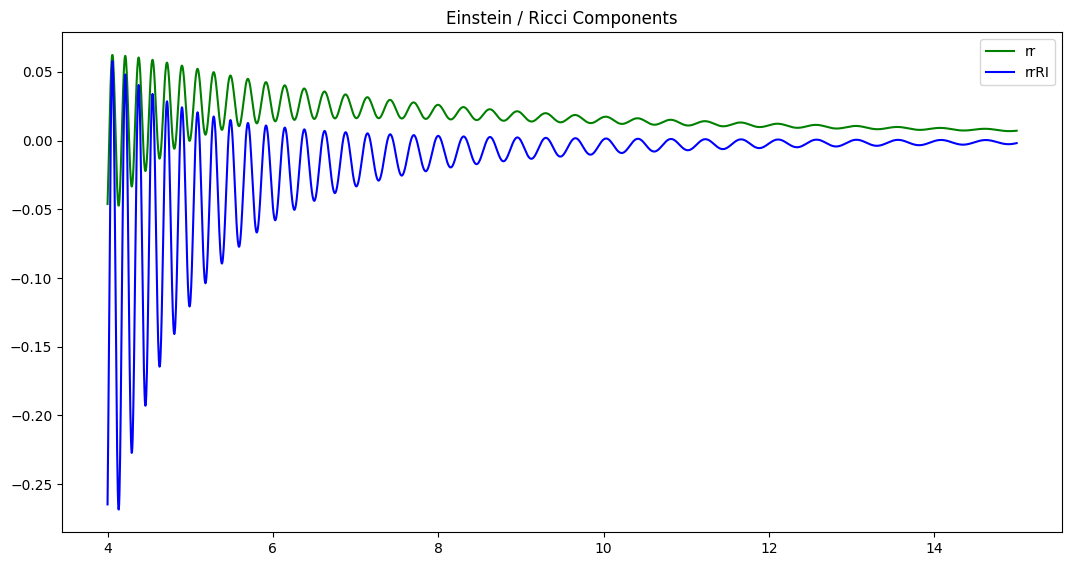

In [30]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

argsRI, funcRI = ri.tensor_lambdify()
print(args) # these are the argument values 

theta = 1
phi = 1
F = 0.006
M = 1
w = 1
t = 1


#Make x values - which we will sub in for r 
x = np.arange(4.0, 15.0, 0.004)

# Call the functions
# note: what scale to use on these ? when is it appropriate to divide by r**2, etc? 
tt = func(t,x,theta, phi, F, M, w)[0][0]

tr = func(t,x,theta, phi, F, M, w)[0][1]

rr = func(t,x,theta, phi, F, M, w)[1][1] 

hh = func(t,x,theta, phi, F, M, w)[2][2]/(x*x)

pp = func(t,x,theta, phi, F, M, w)[3][3]/(x*x*sin(theta)*sin(theta))

rp = func(t,x,theta, phi, F, M, w)[1][3]/(x*sin(theta))


ttRI = funcRI(t,x,theta, phi, F, M, w)[0][0]

trRI = funcRI(t,x,theta, phi, F, M, w)[0][1]

rrRI = funcRI(t,x,theta, phi, F, M, w)[1][1] 

hhRI = funcRI(t,x,theta, phi, F, M, w)[2][2]/(x*x)

ppRI = funcRI(t,x,theta, phi, F, M, w)[3][3]/(x*x*sin(theta)*sin(theta))
rpRI = funcRI(t,x,theta, phi, F, M, w)[1][3]/(x*sin(theta))

fig=plt.figure(figsize=(10, 5))
ax=fig.add_axes([0,2,1.0,1.0])

#ax.plot(x,hh, "lightgrey",label="θθ", linewidth=6.0)
#ax.plot(x,pp, "black",label="φφ", linewidth=0.5)

#ax.plot(x,tt, "-b", label="tt")
ax.plot(x,rr, "-g", label="rr")
#ax.plot(x,tr, "-r", label="tr")

#ax.plot(x,ttRI, "-r", label="ttRI") # tt is 1e-5, small, with Ricci going to zero faster
ax.plot(x,rrRI, "-b", label="rrRI") #rr is large 0.25 - almost everything is here, ricci 3x larger than E
#ax.plot(x,trRI, "lightgrey", label="trRI") # tr component is same in Ricci as Einstein, 0.0002 small.
#ax.plot(x,ppRI, "-b", label="ppRI") # einstein is bigger here, 0.1

ax.legend(loc="upper right")
ax.set_title("Einstein / Ricci Components")


In [31]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

argsRI, funcRI = ri.tensor_lambdify()

theta = 1
phi = 1
F = 0.01
M = 1
w = 1


#Make x values - which we will sub in for r 
x = np.arange(4.0, 15.0, 0.01)

# Call the functions
# note: what scale to use on these ? when is it appropriate to divide by r**2, etc? 


# ax=fig.add_axes([0,2,1.0,1.0])


fig, ax = plt.subplots(figsize=(12, 8))



#ax=fig.add_axes([0,2,1.0,1.0])

camera=Camera(fig)#Make a camera of the figure

for T in np.linspace(0,60*np.pi,250):
    #Our animation will have each frame be a different value of k from the list above  
    #print("T is %f" + str(T))
    #tt = func(T,x,theta, phi, F, M, w)[0][0]
    #tr = func(T,x,theta, phi, F, M, w)[0][1]
    rr = func(T,x,theta, phi, F, M, w)[1][1] 
    #hh = func(T,x,theta, phi, F, M, w)[2][2]/(x*x)
    #pp = func(T,x,theta, phi, F, M, w)[3][3]/(x*x*sin(theta)*sin(theta))
    #rpRI = funcRI(T,x,theta, phi, F, M, w)[1][3]/(x*sin(theta))
    rrRI = funcRI(T,x,theta, phi, F, M, w)[1][1] 
    ttRI = funcRI(T,x,theta, phi, F, M, w)[0][0]

    #ax.plot(x,hh, "lightgrey",label="θθ", linewidth=6.0)
    #ax.plot(x,pp, "black",label="φφ", linewidth=0.5)

    #ax.plot(x,tt, "-b", label="tt")
    ax.plot(x,rr, "-g", label="rr")
    #ax.plot(x,tr, "-r", label="tr")
    ax.plot(x,rrRI, "-b", label="rrRI") #rr is large 0.25 - almost everything is here, ricci 3x larger than E
    ax.plot(x,ttRI, "-r", label="ttRI") # tt is 1e-5, small, with Ricci going to zero faster

    #ax.legend(loc="upper right")
    ax.set_title("Einstein / Ricci Components")


#     ax.plot(*parametric_spiral(t_list,k=K),c=colours[int(500*(np.pi-K)/np.pi)])
    #For a given value of k, we'll plot our function with that k-value   
    camera.snap()

animation=camera.animate();#Make the animation
plt.close() #Stop the empty plot from displaying
animation.save('metric_animation-G.mp4',fps=250/20) #Save the animation-- notes below
Video("metric_animation-G.mp4") #Show the video you've just saved



(t, r, theta, phi, F, M, w)


<lambdifygenerated-14>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array([[2.0*F**2*M*w**2*cos(t*w - log(r)/F)/(2.0*F*M*sin(t*w - log(r)/F) - 2.0*M + 1.0*r), -2*F*M*w*cos(t*w - log(r)/F)/(r*(2*F*M*sin(t*w - log(r)/F) - 2*M + r)), 0, 0], [-2*F*M*w*cos(t*w - log(r)/F)/(r*(2*F*M*sin(t*w - log(r)/F) - 2*M + r)), (8.0*F*M*sin(t*w - log(r)/F) + 2.0*M*cos(t*w - log(r)/F) - 8.0*M + 2.0*r)/(r**2*(2.0*F*M*sin(t*w - log(r)/F) - 2.0*M + 1.0*r)), 0, 0], [0, 0, (4.0*F**2*M**2*sin(t*w - log(r)/F)**2 - 8.0*F*M**2*sin(t*w - log(r)/F) + 3.0*F*M*r*sin(t*w - log(r)/F) + 4.0*M**2 - 2.0*M*r*cos(t*w - log(r)/F) - 3.0*M*r + 1.0*r**2)/(r*(2.0*F*M*sin(t*w - log(r)/F) - 2.0*M + 1.0*r)), 0], [0, 0, 0, (4.0*F**2*M**2*sin(t*w - log(r)/F)**2 - 8.0*F*M**2*sin(t*w - log(r)/F) + 3.0*F*M*r*

#NOT Zero 


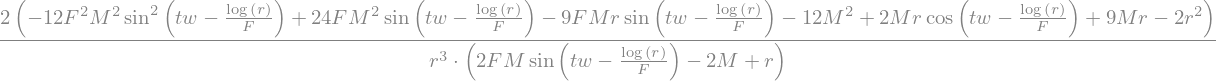

In [32]:
# Ricci scalar
R = RicciScalar.from_riccitensor(ri)
R.simplify()
R.expr


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(t, r, theta, phi, F, M, w)


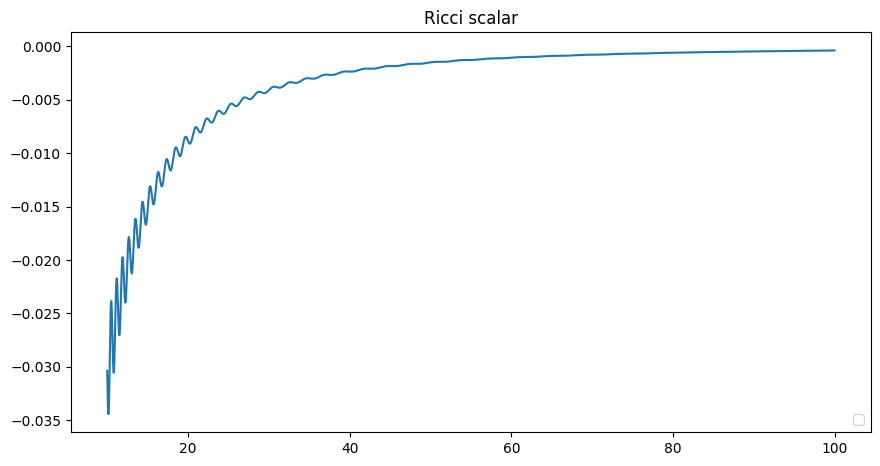

In [33]:
#plot the Ricci scalar

args, funcR = R.tensor_lambdify()
print(args) # these are the argument values 

t = 5

theta = 1
phi = 1
F = 0.01
M = 1
w = 0.5

#Make x values - which we will sub in for r 
x = np.arange(10.0, 100.0, 0.04)

# Call the functions
ricci = funcR(t,x,theta, phi, F, M, w)

fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.set_title("Ricci scalar")
ax.legend(loc="lower right")
ax.plot(x,ricci, label="Ricci scalar")



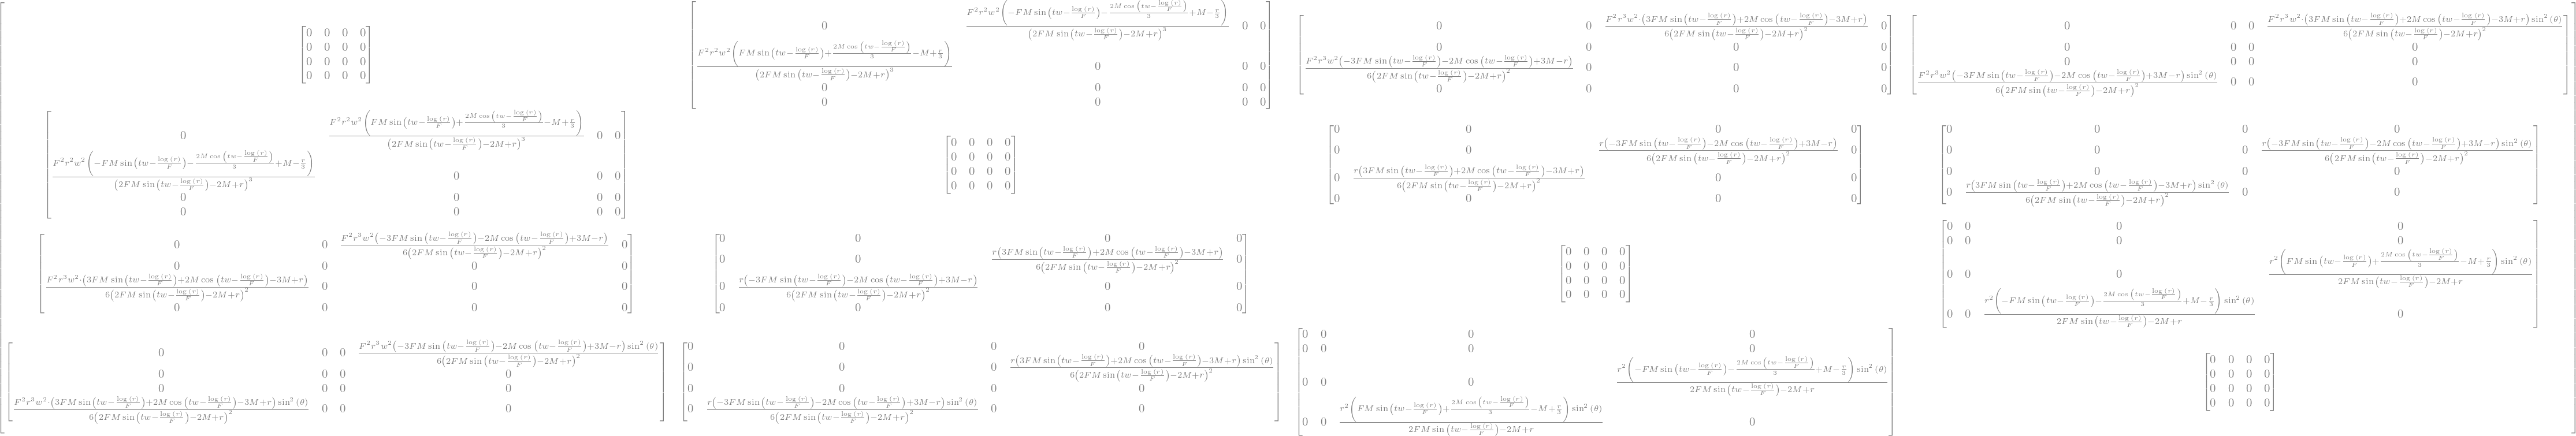

In [34]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

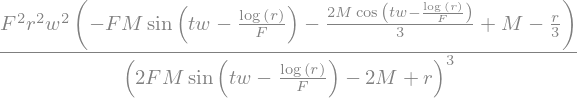

In [35]:
weyl[0,1,0,1]

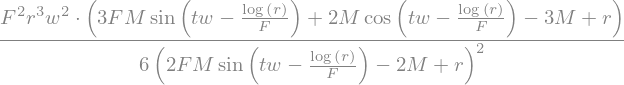

In [36]:
weyl[0,2,0,2]

(t, r, theta, phi, F, M, w)


Text(0.5, 1.0, 'Weyl tensor')

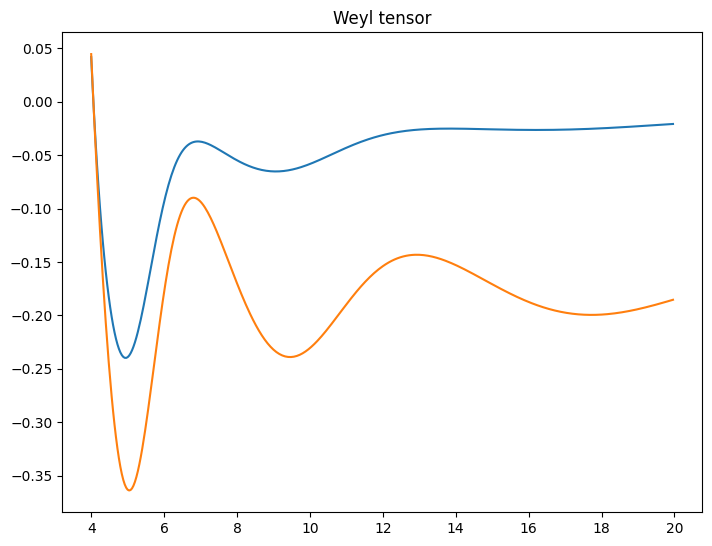

In [37]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

t = 1

theta = 1
phi = 1
F = 0.1
M = 1
w = 10



#Make x values - which we will sub in for r 
x = np.arange(4, 20.0, 0.04)

# Call the functions
y = func(t,x,theta, phi, F, M, w)[0][1][0][1]/x
z = -func(t,x,theta, phi, F, M, w)[0][2][0][2]/(x*x) # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("Weyl tensor")


